In [19]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import warnings

warnings.filterwarnings('ignore')

# Question 1:

In [20]:
# load iris dataset
iris=datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

LDA implementation using scikit-learn

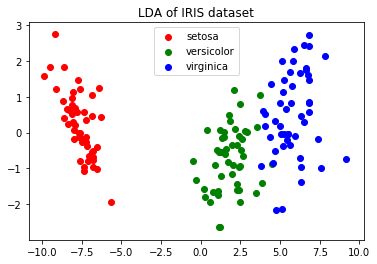

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_r = lda.fit(X,y).transform(X)         # fitting the model

# Visualize the results
plt.figure()
for c,i,target_name in zip("rgb",[0,1,2],target_names):
    plt.scatter(X_r[y==i,0],X_r[y==i,1],c=c,label=target_name)
plt.legend()
plt.title('LDA of IRIS dataset')
plt.show()


# Question 2:

(1) In logistic regression method, please derive the derivative of the negative logarithm of the likelihood function with respect to parameter 𝑤. You need to show the detailed steps to obtain the following results.

#### <center> $\nabla_w\epsilon(w) = \sum^{N}_{n = 1}(f(x_n) - y_n)x_n$ <center>

Solution:

We can tranfer negative logarithm of the likelihood at first:

$\epsilon(w) = -\sum^{N}_{n = 1}[y_n(\ln f_x(x_n)) + (1-y_n)\ln(1 - f(x_n))]$

$= -\sum^{N}_{n = 1}[-y_n(\ln(1+e^{-(w^T + \omega_0)})) + (1 - y_n)\times-(w^Tx_n + \omega_0)]$

$= -\sum^{N}_{n = 1}[y_n(w^Tx_n + \omega_0) - (w^Tx_n + \omega_0) -\ln(1+e^{-(w^Tx_n + \omega_0)})]$

$= -\sum^{N}_{n = 1}[y_n(w^Tx_n + \omega_0) - \ln(e^{w^Tx_n + \omega_0} + \ln(1+e^{-(w^Tx_n + \omega_0)}))]$

$= -\sum^{N}_{n = 1}[y_n(w^Tx_n + \omega_0) - \ln(e^{(w^Tx_n + \omega_0)}+ 1)]$

Next we can take the derivative of $\epsilon$ with respect to parameter $w$

$\nabla_w\epsilon(w) = (\frac{\partial}{\partial w}\sum^{N}_{n = 1}[\ln(e^{(w^Tx_n + \omega_0)}+ 1) - y_n(w^Tx_n + \omega_0)])$

$= \sum^{N}_{n = 1}[\frac{\partial}{\partial w}\ln(e^{(w^Tx_n + \omega_0)}+ 1) - \frac{\partial}{\partial w}(w^Tx_ny_n + \omega_0y_0)$

$= \sum^{N}_{n = 1}(\frac{e^{w^Tx_n+ \omega_0}x_n}{1 + e^{w^Tx_n + \omega_0}} - x_ny_n)$

$= \sum^{N}_{n = 1}(\frac{1}{1 + e^{(-w^T+ \omega_0)}} - y_n)x_n$

$= \sum^{N}_{n = 1}(f(x_n)- y_n)x_n$

(2) Please download the breast cancer data set from UCI Machine Learning repository. Implement your 
Logistic regression classifier with ML estimator using Stochastic gradient descent and Mini-Batch 
gradient descent algorithms. Do not use any package/tool. Use cross-validation for evaluation and 
report the recall, precision, and accuracy on malignant class prediction (class label malignant is 
positive). Write down each step of your solution.

In [22]:
# load data
bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target

In [23]:
X_max = np.max(X, axis = 0)
X_max

array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 3.454e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
       7.895e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
       2.226e-01, 1.058e+00, 1.252e+00, 2.910e-01, 6.638e-01, 2.075e-01])

In [24]:
X = X / X_max
X

array([[0.63998577, 0.26425662, 0.65145889, ..., 0.91202749, 0.69313046,
        0.57301205],
       [0.73176805, 0.45239308, 0.70503979, ..., 0.63917526, 0.41428141,
        0.42901205],
       [0.70046247, 0.54098778, 0.68965517, ..., 0.83505155, 0.54429045,
        0.42207229],
       ...,
       [0.59053718, 0.71486762, 0.57453581, ..., 0.48728522, 0.33413679,
        0.37686747],
       [0.73283529, 0.74669043, 0.74323607, ..., 0.91065292, 0.6156975 ,
        0.59759036],
       [0.27605834, 0.62474542, 0.25421751, ..., 0.        , 0.43250979,
        0.33922892]])

In [25]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [26]:
#Implement Logistic regression classifier with ML estimator 
#using Stochastic gradient descent 
#and Mini-Batch gradient descent algorithms
class LRmodel:
    
    def __inti__(self, lr = 0.01, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.omega = None
        self.size = 0
        
    def sigmoid(self, x):
        return 1.0/(1 + np.exp(-x))
    
    def mbgd(self, X, y, lr = 0.0001, n_iter = 1000, seed = 42, size = 50):
        n_samples, n_features = X.shape      
        self.weights = np.random.rand(n_features)
        self.omega = np.random.rand(1)
        
        mini_batches = []
        n_batches = X.shape[0] // size + 1
        for _ in range(n_iter):
            np.random.seed(seed)
            np.random.shuffle(X)
            np.random.shuffle(y)
            
            for i in range(0, n_batches):
                batch_x = X[i * size:(i+1)*size,:]
                batch_y = y[i * size:(i+1)*size] 

                if (X.shape[0] - size * i) // size == 0:
                    batch_x = X[size*i:,:]
                    batch_y = y[size*i:]
                
                z = np.dot(batch_x, self.weights) + self.omega
                fx = self.sigmoid(z)

                dw = (1/ n_samples) * np.dot(batch_x.T, (fx - batch_y))
                do = (1/ n_samples) * np.sum(fx - batch_y)

                self.weights -= lr* dw
                self.omega -= lr* do
                
    def sgd(self, X, y, lr = 0.0001, n_iter = 1000, seed = 42):
        n_samples, n_features = X.shape
        self.weights = np.random.rand(n_features)
        self.omega = np.random.rand(1)
        for _ in range(n_iter):
            np.random.seed(seed)
            np.random.shuffle(X)
            np.random.shuffle(y)
            for i in range(100):
                random_index = np.random.randint(n_samples)
                x_i = X[random_index:random_index+1]
                y_i = y[random_index:random_index+1]
                z = np.dot(x_i, self.weights) + self.omega
#                 z = z / np.max(z)
                fx = self.sigmoid(z)

                dw = (1/ n_samples) * np.dot(x_i.T, (fx - y_i))
                do = (1/ n_samples) * np.sum(fx - y_i)

                self.weights -= lr* dw
                self.omega -= lr* do
                
                
    def predict(self, X_test, y_test):
        z = np.dot(X_test, self.weights) + self.omega
        y_pred = 1.0/(1 + np.exp(-z)) 
        y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
        
        return y_pred_cls

cross-validation for evaluation and report the recall, precision, and accuracy

In [28]:
# Mini-Batch gradient descent 

kf = KFold(n_splits = 10)
recall, precision, accuracy = [],[],[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    LR = LRmodel()
    LR.mbgd(X_train,y_train, size = 50, lr = 0.01, n_iter = 1000, seed = 42)
    y_pred = LR.predict(X_test,y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    recall.append(tp/(tp+fn))
    precision.append(tp/(tp+fp))
    accuracy.append((tp+tn)/(tp+fn+tn+fp))
Recall_mbgd = sum(recall) / len(recall)
Precision_mbgd = sum(precision) / len(precision)
Accuracy_mbgd = sum(accuracy) / len(accuracy)
print('Recall on malignant class prediction with Mini-Batch gradient descent: ', Recall_mbgd)
print('Precision on malignant class prediction with Mini-Batch gradient descent: ', Precision_mbgd)
print('Accuracy on malignant class prediction with Mini-Batch gradient descent: ', Accuracy_mbgd)

Recall on malignant class prediction with Mini-Batch gradient descent:  0.8834511911048771
Precision on malignant class prediction with Mini-Batch gradient descent:  0.6011404261536947
Accuracy on malignant class prediction with Mini-Batch gradient descent:  0.5432957393483709


In [30]:
# Stochastic gradient descent gradient descent 

kf = KFold(n_splits = 10)
recall, precision, accuracy = [],[],[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    LR = LRmodel()
    LR.sgd(X_train,y_train, lr = 0.01, n_iter = 1000, seed = 42)
    y_pred = LR.predict(X_test,y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    recall.append(tp/(tp+fn))
    precision.append(tp/(tp+fp))
    accuracy.append((tp+tn)/(tp+fn+tn+fp))
Recall_sgd = sum(recall) / len(recall)
Precision_sgd = sum(precision) / len(precision)
Accuracy_sgd = sum(accuracy) / len(accuracy)
print('Recall on malignant class prediction with Stochastic gradient descent: ', Recall_sgd)
print('Precision on malignant class prediction with Stochastic gradient descent gradient descent: ', Precision_sgd)
print('Accuracy on malignant class prediction with Stochastic gradient descent gradient descent: ', Accuracy_sgd)

Recall on malignant class prediction with Stochastic gradient descent:  1.0
Precision on malignant class prediction with Stochastic gradient descent gradient descent:  0.6276629072681704
Accuracy on malignant class prediction with Stochastic gradient descent gradient descent:  0.6276629072681704


# Question 4:

Given 10 points in Table 1, along with their classes and their Lagrangian multipliers (𝛼𝑖), answer the following questions:

(1) What is the equation of the SVM hyperplane ℎ(𝑥)? Draw the hyperplane with the 10 points.

$y(x) = w^T x + w_0$

$w^T = \sum a_i y_i x_i^T = (4, 2.9)\times0.414+(2.5,1)\times 0.018+ (3.5, 4)\times0.018+ (2, 2.1)\times0.414 = (2.592, 2.16)$

We get w = $(2.592, 2.16)$

$1 = 4 \times 2.592 + 2.9 \times 2.16 +w_0$

=> $w_0 = -15.632$

$-1 = 2.5 \times 2.592 + 1 \times 2.16 +w_0$

=> $w_0 = -9.64$

$1 = 3.5 \times 2.592 + 4 \times 2.16 +w_0$

=> $w_0 = -16.712$

$-1 = 2 \times 2.592 + 2.1 \times 2.16 +w_0$

=> $w_0 = -10.72$

Take the average:

so we get $w_O = -13.176$

$y(x_1,x_2) = 2.592x_1 + 2.16x_2 - 13.176 = 0$

Then $x_2 = 6.1 - 1.2 x_1 $

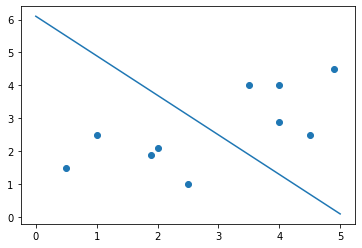

In [50]:
x1 = [4, 4, 1, 2.5, 4.9, 1.9, 3.5, 0.5, 2, 4.5]
x2 = [2.9, 4, 2.5, 1, 4.5, 1.9, 4, 1.5, 2.1, 2.5]
y = [1, 1, -1, -1, 1, -1, 1, -1, -1, 1]
a = [0.414, 0, 0, 0.018, 0, 0, 0.018, 0, 0.414, 0]

x_svm = np.linspace(0, 5, 10)
y_svm = -1.2*x_svm + 6.1

plt.scatter(x1, x2)
plt.plot(x_svm, y_svm)
plt.show()

(2) What is the distance of 𝑥6 from the hyperplane? Is it within the margin of the classifier?

$r = \frac{|w^Tx+b|}{||w||}$

In [52]:
dis = abs(2.592*1.9+2.16*1.9-13.176)/np.sqrt(2.592**2 + 2.16**2)
print(dis,"is the distance of x6 from the hyperplane")

1.2291540473558014 is the distance of x6 from the hyperplane


In [53]:
margin = 2 /np.sqrt(2.592**2 + 2.16**2)
margin

0.5927633330226666

So it is not within the margin of the classifier.

(3) Classify the point 𝑧 = (3,3)^T using ℎ(𝑥) from above. 

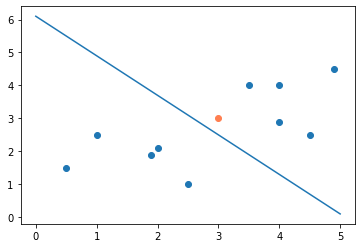

In [54]:
plt.scatter(x1, x2)
plt.scatter([3],[3], color="coral")
plt.plot(x_svm, y_svm)
plt.show()

From the graph we can see, point [3,3] is classified to catergory 1.